## Basic Functions


In [3]:
import cv2 as cv
import os
import matplotlib.pyplot as plt

def matplotlib_imshow( image,title = 'image', cmap=None):
    # Convert BGR to RGB
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    
    plt.axis('off')
    plt.show()

Current Working Directory: /run/media/runtime_terror/mass storage/coding/courses/LearnOpenCV


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/run/media/runtime_terror/mass storage/coding/courses/LearnOpenCV/.venv/lib64/python3.14/site-packages/cv2/qt/plugins"


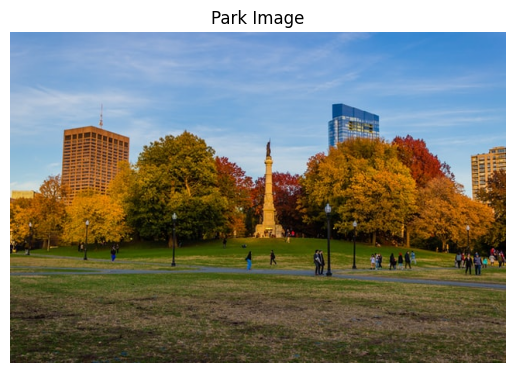

In [4]:

cwd = os.getcwd()
print("Current Working Directory:", cwd)
park_image_path = os.path.join(cwd, 'Resources', 'Photos', 'park.jpg')
# Read in an image
img = cv.imread(park_image_path)
cv.imshow('Park', img)

matplotlib_imshow(img, title='Park Image')

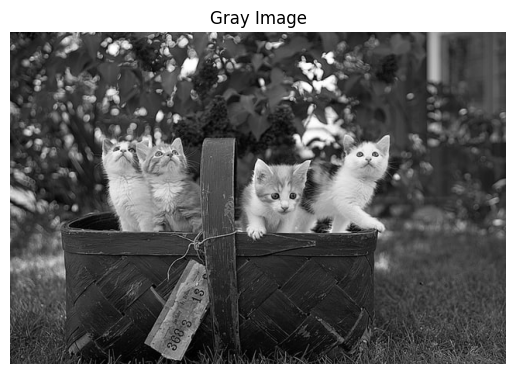

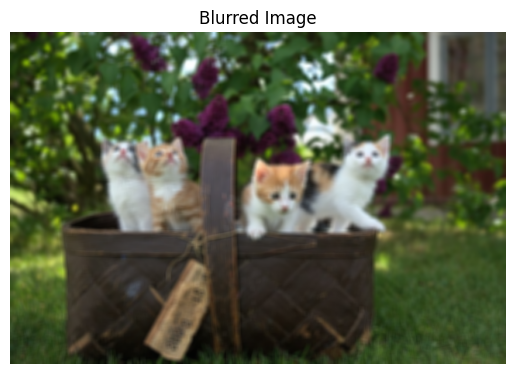

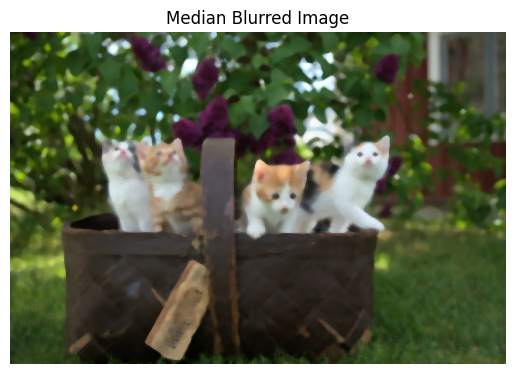

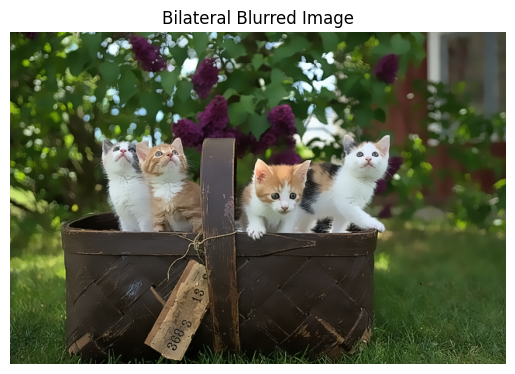

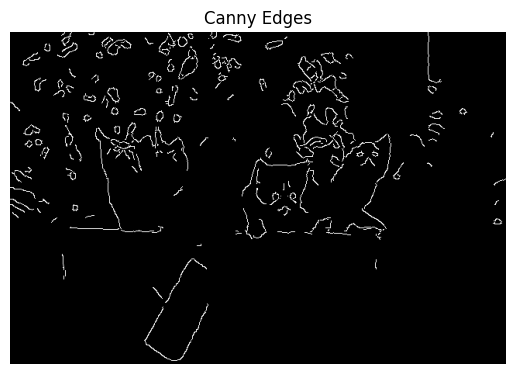

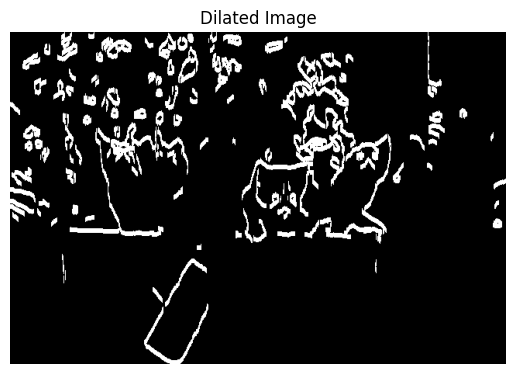

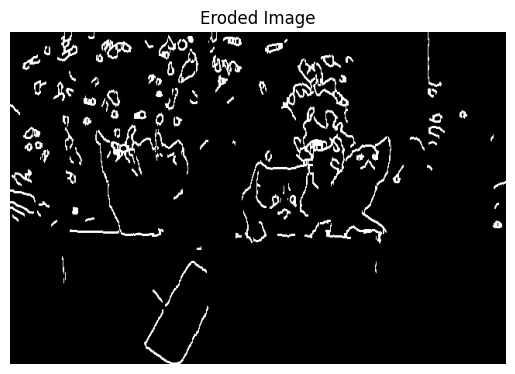

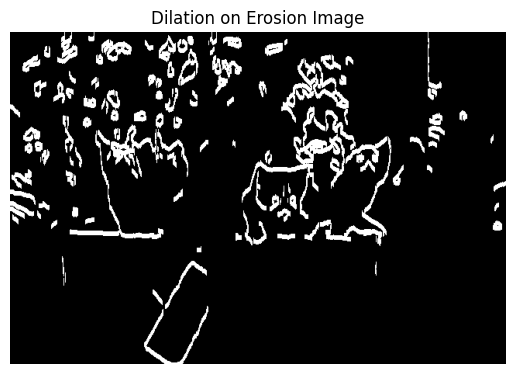

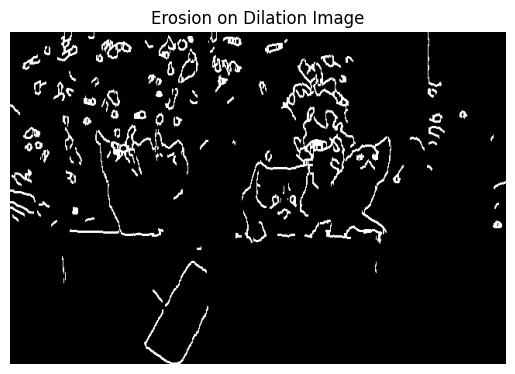

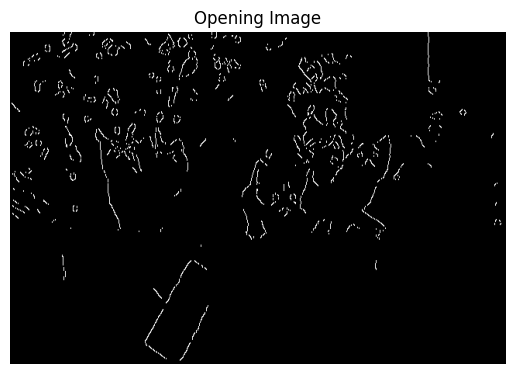

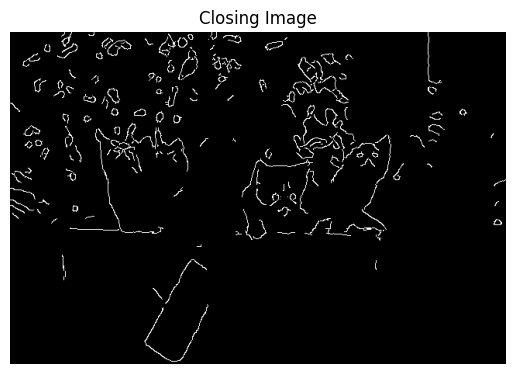

In [16]:
# Converting to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
matplotlib_imshow(gray, title='Gray Image', cmap='gray')

# Applying Gaussian Blur
blur = cv.GaussianBlur(img, (7,7), cv.BORDER_DEFAULT)
matplotlib_imshow(blur, title='Blurred Image')

median = cv.medianBlur(img, 7)
matplotlib_imshow(median, title='Median Blurred Image')

bilateral = cv.bilateralFilter(img, 15, 35, 25)
matplotlib_imshow(bilateral, title='Bilateral Blurred Image')
# Edge Cascade
canny = cv.Canny(blur, 125, 175)
matplotlib_imshow(canny, title='Canny Edges')

# Dilating the image
dilated = cv.dilate(canny, (7,7), iterations=5)
matplotlib_imshow(dilated, title='Dilated Image')

eroded = cv.erode(dilated, (7,7), iterations=3)
matplotlib_imshow(eroded, title='Eroded Image')

dilasion_on_erosion = cv.dilate(eroded, (7,7), iterations=3)
matplotlib_imshow(dilasion_on_erosion, title='Dilation on Erosion Image')

erosion_on_dilation = cv.erode(dilated, (7,7), iterations=3)
matplotlib_imshow(erosion_on_dilation, title='Erosion on Dilation Image')

opening = cv.morphologyEx(canny, cv.MORPH_OPEN, (7,7))
matplotlib_imshow(opening, title='Opening Image')   

closing = cv.morphologyEx(canny, cv.MORPH_CLOSE, (7,7))
matplotlib_imshow(closing, title='Closing Image')

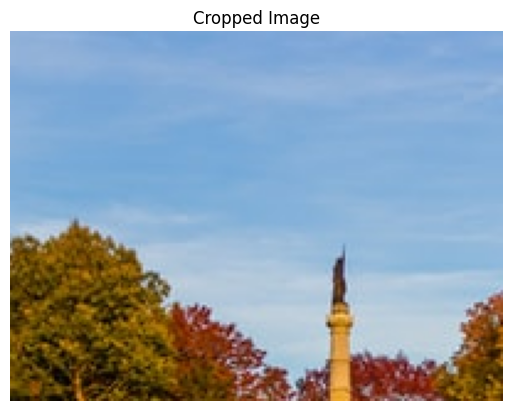

In [7]:
cropped = img[50:200, 200:400]
matplotlib_imshow(cropped, title='Cropped Image')

In [8]:
import cv2 as cv


dog_video_path = os.path.join(cwd, 'Resources', 'Videos', 'dog.mp4')
capture = cv.VideoCapture(dog_video_path)


while True:
    isTrue, frame = capture.read()
    
    # if cv.waitKey(20) & 0xFF==ord('d'):
    # This is the preferred way - if `isTrue` is false (the frame could 
    # not be read, or we're at the end of the video), we immediately
    # break from the loop. 
    if isTrue:    
        cv.imshow('Video', frame)
        if cv.waitKey(20) & 0xFF==ord('d'):
            break            
    else:
        break

capture.release()
cv.destroyAllWindows()

## Threshold

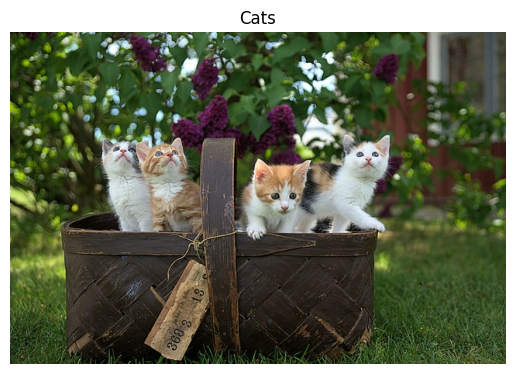

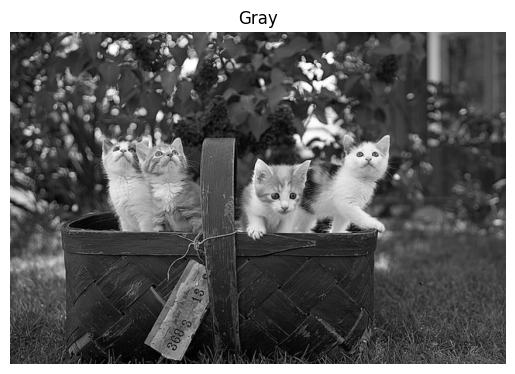

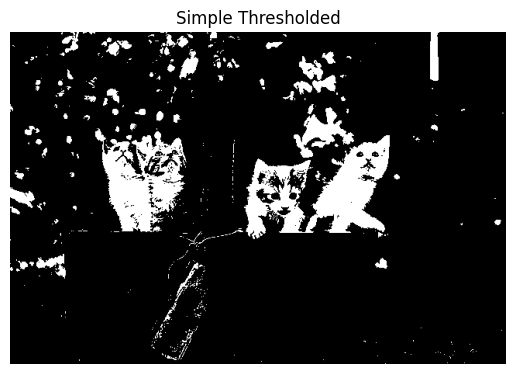

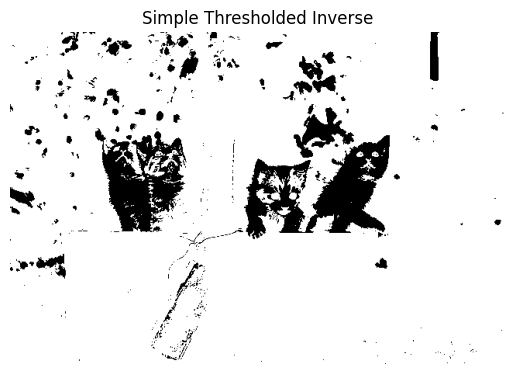

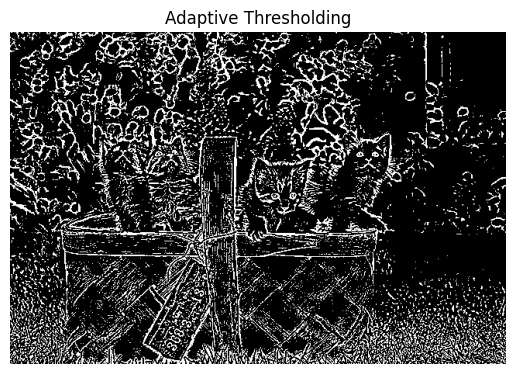

In [12]:
path = os.path.join(cwd, 'Resources', 'Photos', 'cats.jpg')

img = cv.imread(path)
matplotlib_imshow(img, title='Cats')
# cv.imshow('Cats', img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
matplotlib_imshow(gray, title='Gray', cmap='gray')
# cv.imshow('Gray', gray)

# Simple Thresholding
threshold, thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY )
matplotlib_imshow(thresh, title='Simple Thresholded', cmap='gray')
# cv.imshow('Simple Thresholded', thresh)

threshold, thresh_inv = cv.threshold(gray, 150, 255, cv.THRESH_BINARY_INV )
matplotlib_imshow(thresh_inv, title='Simple Thresholded Inverse', cmap='gray')
# cv.imshow('Simple Thresholded Inverse', thresh_inv)

# Adaptive Thresholding
adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 9)
matplotlib_imshow(adaptive_thresh, title='Adaptive Thresholding', cmap='gray')

# cv.imshow('Adaptive Thresholding', adaptive_thresh)

# cv.waitKey(0)


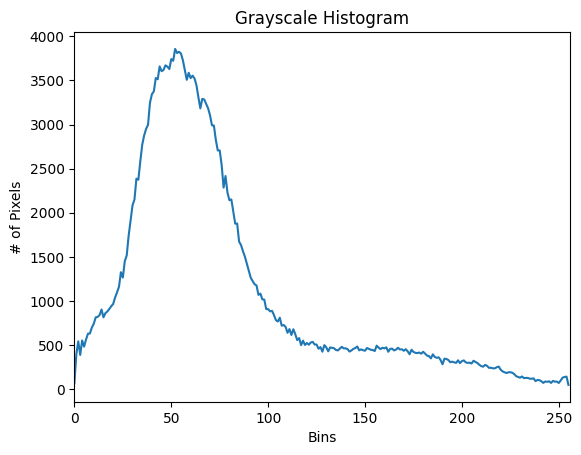

In [18]:
histogram = cv.calcHist([gray], [0], None, [256], [0,256])
plt.figure()
plt.title('Grayscale Histogram')
plt.xlim([0,256])
plt.xlabel('Bins')
plt.ylabel('# of Pixels')
plt.plot(histogram)
plt.xlim([0,256])
plt.show()

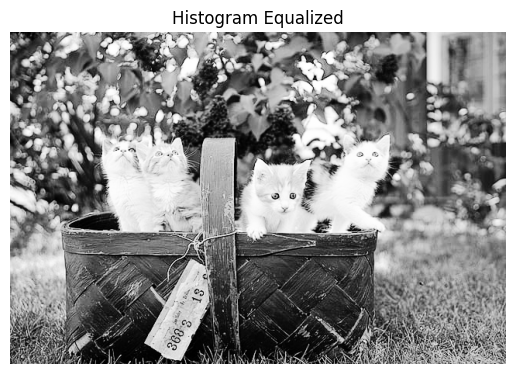

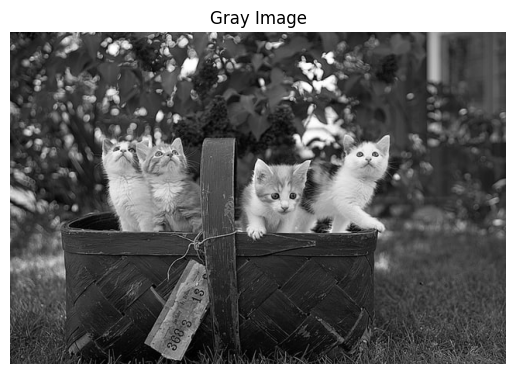

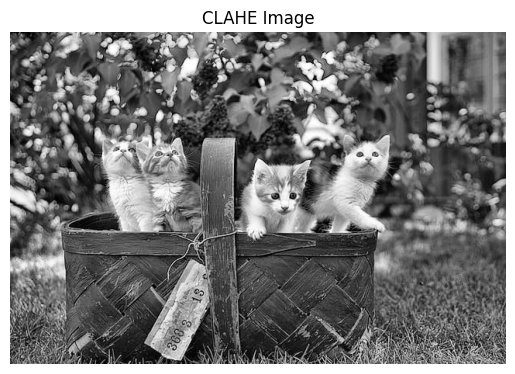

In [23]:
histogram_equalized = cv.equalizeHist(gray)
matplotlib_imshow(histogram_equalized, title='Histogram Equalized', cmap='gray')

# matplotlib_imshow(img, title='Original Image')
matplotlib_imshow(gray, title='Gray Image', cmap='gray')

clahe_image = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(gray)
matplotlib_imshow(clahe_image, title='CLAHE Image', cmap='gray')